In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.ticker as mtick
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('telephone.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.dropna(inplace = True)

In [8]:
bins = [-1, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_grouped'] = pd.cut(df['tenure'], bins=bins, labels=labels)

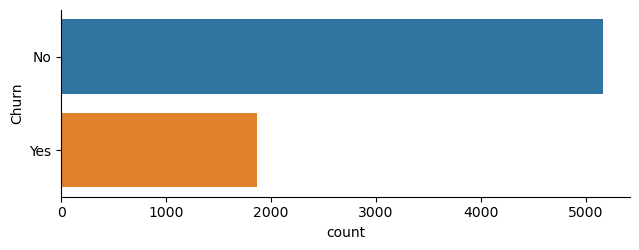

In [9]:
ax = sns.catplot(y='Churn', kind='count', data=df, height=2.6, aspect=2.5)

# Gender, Seniority, partner and dependends

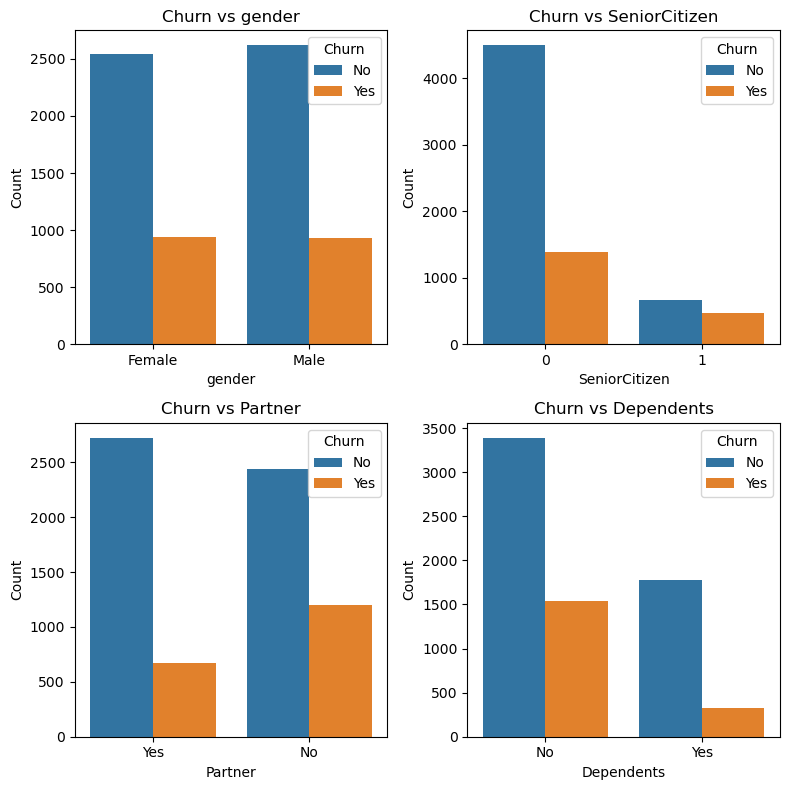

In [10]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=df, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        
plt.tight_layout()
plt.show()


Non-senior customers without a partner and without dependents tend to churn more frequently than their counterparts.
Gender has no influence on our churn rate

# Service

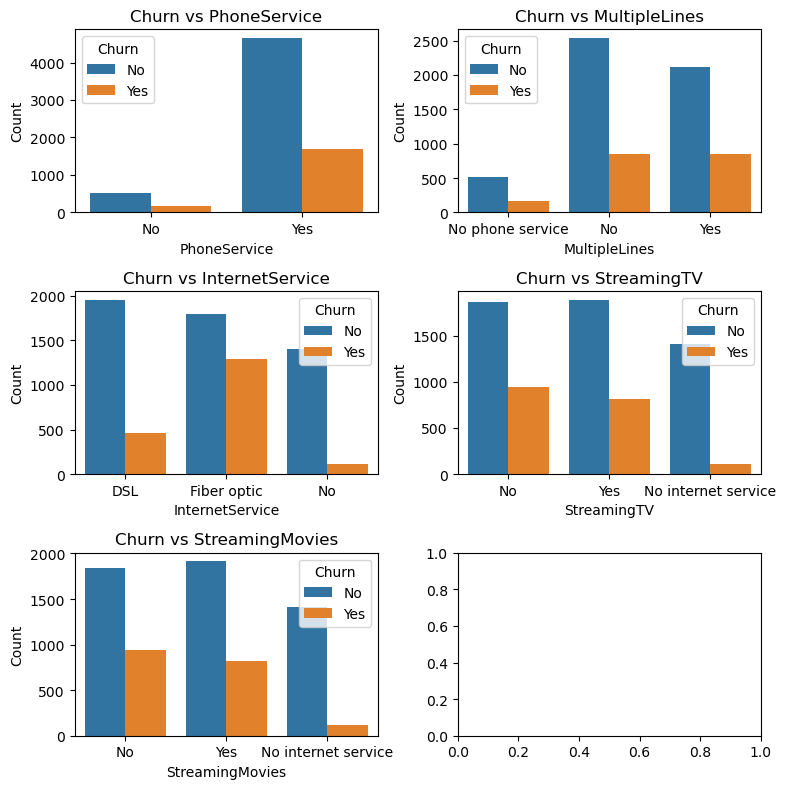

In [11]:
services = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


Customers who use phone service churn more than those who don't use that service. Customers who have fiber optic tend to churn significantly more than ones that have DSL.
Now let's dive deeper into those two findings.

# Security_support

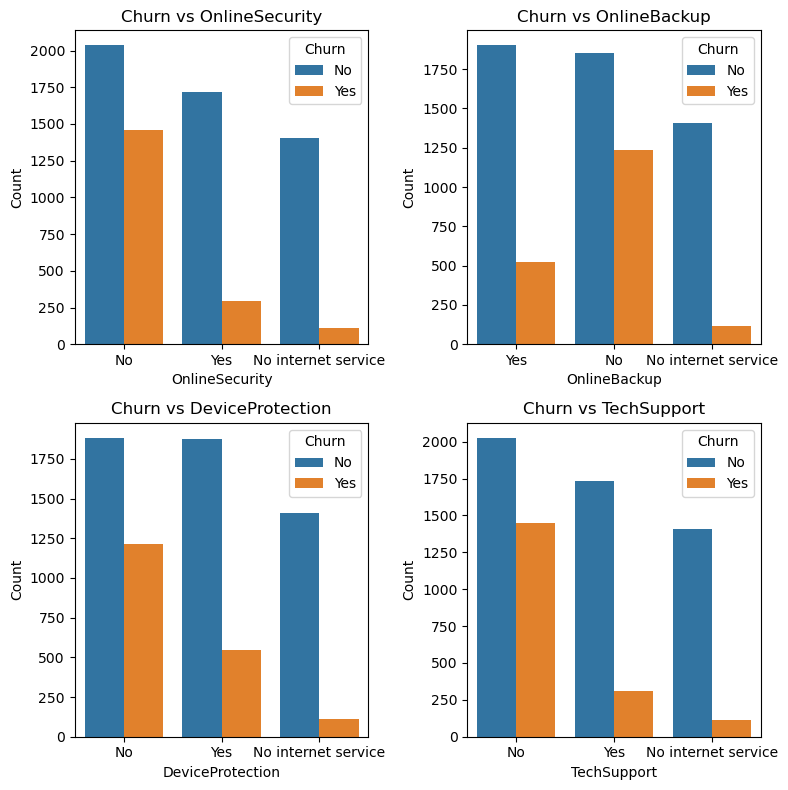

In [12]:
security_support = df[['Churn', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport']]
cols = security_support.columns[1:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=security_support, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

With regards to the churn rate based on security_support variables, customers without online security, online backup, device protecion and tech support tend to churn more often than their counterparts.

# Contract type

<Axes: xlabel='Contract', ylabel='count'>

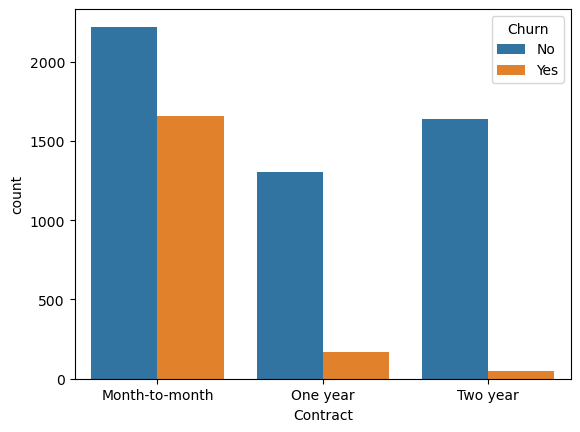

In [13]:
sns.countplot(data=df, x=df['Contract'], hue='Churn')

Customers with Month-to-month contracts tend to churn more often then customers with one year and two year contracts

# Churn analysis based on paying options

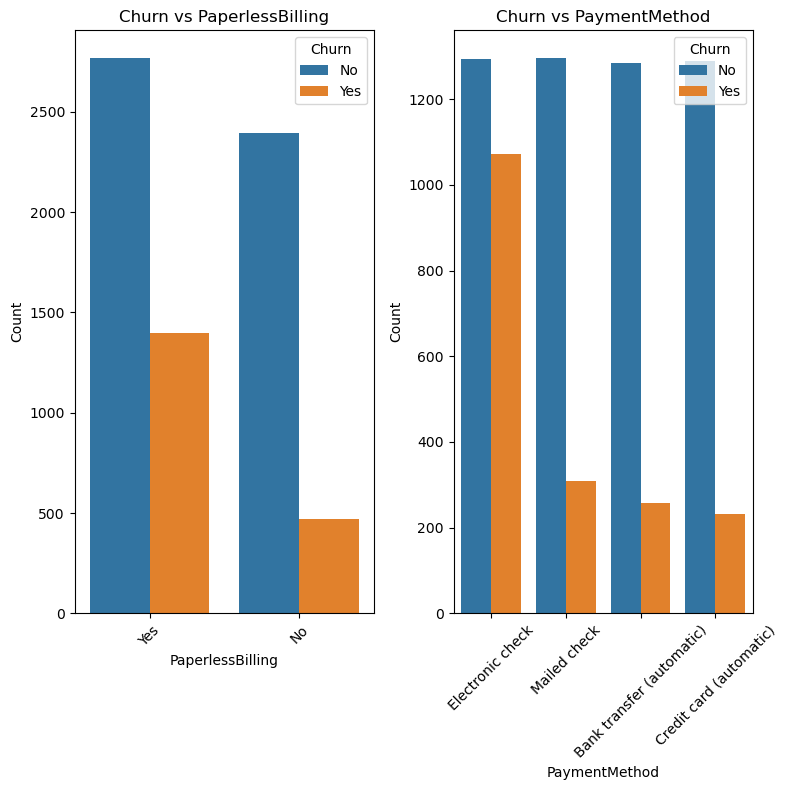

In [14]:
paying_options = df[['Churn', 'PaperlessBilling', 'PaymentMethod']]
cols = paying_options.columns[1:]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=paying_options, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

Customers with paperless billing and electronic checks are more likely to churn than customers without paperless billing and than the customers with other payment methods.

# Churn analysis based on tenure group

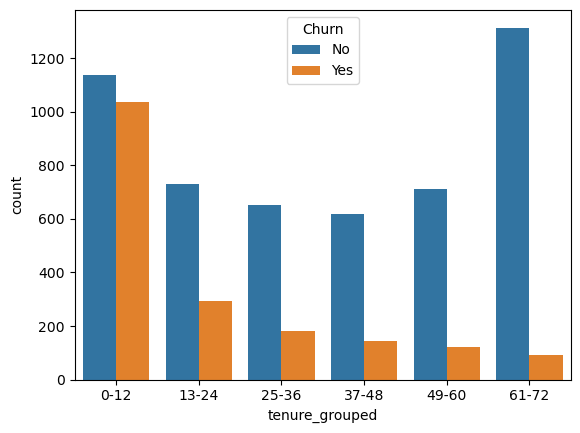

In [15]:
sns.countplot(data = df, x = 'tenure_grouped', hue = 'Churn')
plt.show()

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_grouped'],
      dtype='object')

Customers who spent less than 1 year using our services tend to churn substantially more than the customers of other tenure groups. Additionally, there is a negative correlation between churn rate and tenure group 0-12 (months).

As the tenure increases, the churn rate decreases

# Charges

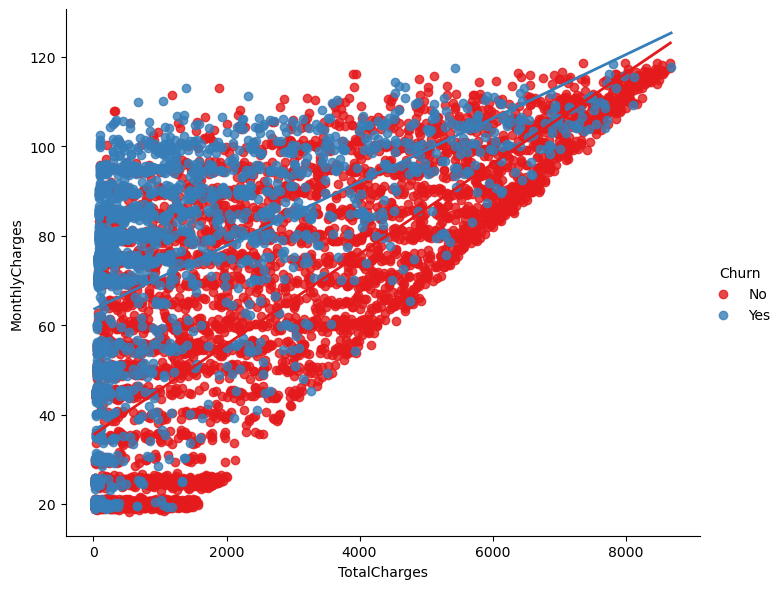

In [17]:
sns.lmplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', ci=None, height=6, aspect=1.2, palette='Set1', line_kws={'linewidth': 2})
sns.despine()
plt.show()

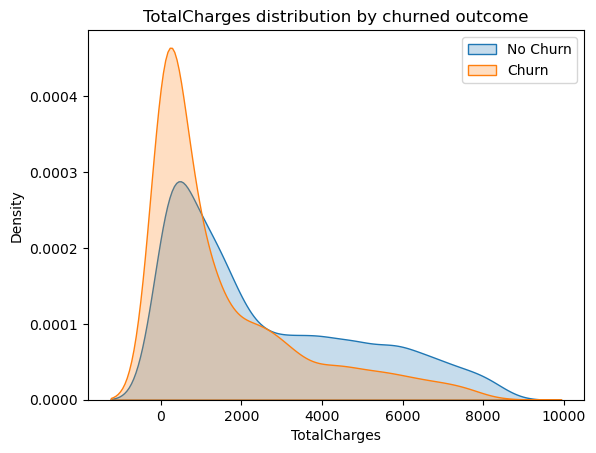

In [18]:
sns.kdeplot(df['TotalCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['TotalCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('TotalCharges')
plt.title('TotalCharges distribution by churned outcome')
plt.show()

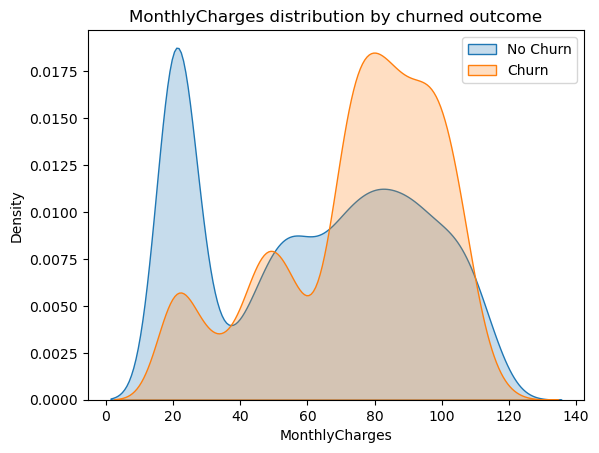

In [19]:
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('MonthlyCharges')
plt.title('MonthlyCharges distribution by churned outcome')
plt.show()

Customers who have churned tend to have higher average monthly charges but significantly lower total charges

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_grouped'],
      dtype='object')

# Converting Categorical to Numerical

In [21]:
le = preprocessing.LabelEncoder()

In [22]:
le.fit(df['gender'])

LabelEncoder()

In [23]:
col_list = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [24]:
for i in col_list:
    df[i] = le.fit_transform(df[i])

In [25]:
df = df.drop('tenure_grouped', axis = 1)
df = df.drop('customerID', axis = 1)

# Train-Test Split

In [26]:
X = df.drop('Churn', axis= 1)
y = df['Churn']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.45) 

In [28]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


# Decision Tree

In [29]:
clf = DecisionTreeClassifier(min_samples_split=700)

In [30]:
clf = clf.fit(X_train, y_train)

In [31]:
clf

DecisionTreeClassifier(min_samples_split=700)

[Text(0.5555555555555556, 0.9, 'x[14] <= 0.5\ngini = 0.389\nsamples = 3867\nvalue = [2846, 1021]'),
 Text(0.3333333333333333, 0.7, 'x[11] <= 0.5\ngini = 0.488\nsamples = 2125\nvalue = [1225, 900]'),
 Text(0.2222222222222222, 0.5, 'x[4] <= 6.5\ngini = 0.5\nsamples = 1461\nvalue = [729, 732]'),
 Text(0.1111111111111111, 0.3, 'gini = 0.458\nsamples = 522\nvalue = [185, 337]'),
 Text(0.3333333333333333, 0.3, 'x[17] <= 69.95\ngini = 0.487\nsamples = 939\nvalue = [544, 395]'),
 Text(0.2222222222222222, 0.1, 'gini = 0.359\nsamples = 294\nvalue = [225, 69]'),
 Text(0.4444444444444444, 0.1, 'gini = 0.5\nsamples = 645\nvalue = [319, 326]'),
 Text(0.4444444444444444, 0.5, 'gini = 0.378\nsamples = 664\nvalue = [496, 168]'),
 Text(0.7777777777777778, 0.7, 'x[17] <= 93.675\ngini = 0.129\nsamples = 1742\nvalue = [1621, 121]'),
 Text(0.6666666666666666, 0.5, 'x[17] <= 43.725\ngini = 0.076\nsamples = 1306\nvalue = [1254, 52]'),
 Text(0.5555555555555556, 0.3, 'gini = 0.02\nsamples = 596\nvalue = [590, 6

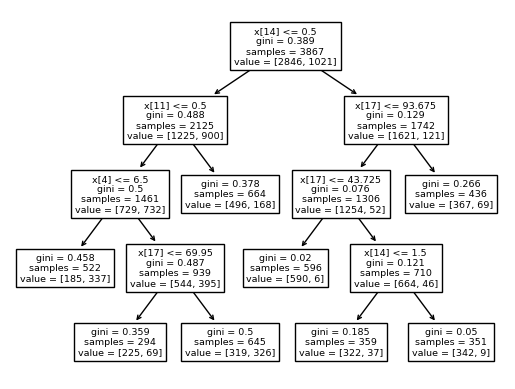

In [32]:
tree.plot_tree(clf)

# Looking at the Accuracy score of training data

In [33]:
y_pred_train_clf = clf.predict(X_train)

In [34]:
y_train

6040    1
5236    0
2333    0
5169    0
1732    0
       ..
4939    0
3269    0
1658    1
2612    0
2737    0
Name: Churn, Length: 3867, dtype: int32

In [35]:
y_pred_train_clf

array([1, 0, 0, ..., 1, 0, 0])

In [36]:
acc = accuracy_score(y_train,y_pred_train_clf)

In [37]:
acc

0.7770881820532712

In [38]:
cm = confusion_matrix(y_train,y_pred_train_clf)

Text(0.5, 1.0, 'Prediction')

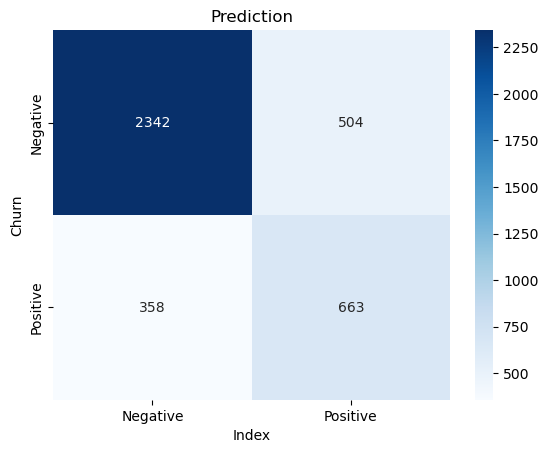

In [39]:
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Index')
plt.ylabel('Churn')
plt.title('Prediction')

# Looking at the Accuracy score of testing data

In [40]:
y_pred_test_clf = clf.predict(X_test)

In [41]:
acc = accuracy_score(y_test,y_pred_test_clf)

In [42]:
acc

0.7740916271721959

Text(0.5, 1.0, 'Prediction')

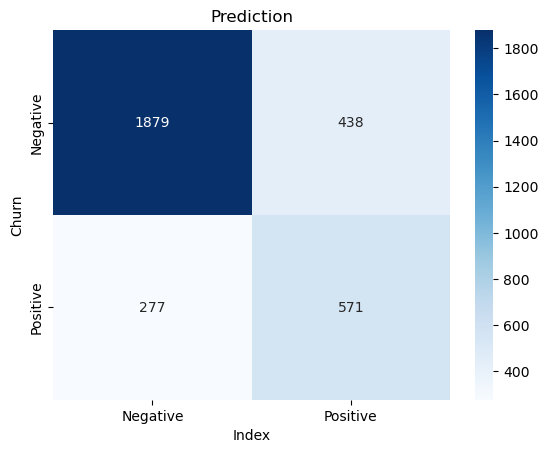

In [43]:
cm = confusion_matrix(y_test,y_pred_test_clf)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Index')
plt.ylabel('Churn')
plt.title('Prediction')